# 911 Calls  Project 

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [138]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [140]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [142]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** The top 5 zipcodes for 911 calls? **

In [143]:
df['zip'].value_counts().head(10)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
19002.0    3050
19468.0    2990
19454.0    2781
19090.0    2635
19038.0    2578
Name: zip, dtype: int64

** The top 5 townships (twp) for 911 calls? **

In [144]:
df['twp'].value_counts().head(8)

LOWER MERION        8443
ABINGTON            5977
NORRISTOWN          5890
UPPER MERION        5227
CHELTENHAM          4575
POTTSTOWN           4146
UPPER MORELAND      3434
LOWER PROVIDENCE    3225
Name: twp, dtype: int64

Unique title codes


In [145]:
df['title'].nunique()

110

## Creating new features

In [146]:
df['Reason1'] = df['title'].apply(lambda title: title.split(':')[1])

In [11]:
df['Reason1'].value_counts()


 VEHICLE ACCIDENT -              23066
 DISABLED VEHICLE -               7702
 VEHICLE ACCIDENT                 5573
 FIRE ALARM                       5510
 RESPIRATORY EMERGENCY            5112
 CARDIAC EMERGENCY                5012
 FALL VICTIM                      4863
 ROAD OBSTRUCTION -               3144
 SUBJECT IN PAIN                  2687
 HEAD INJURY                      2631
 UNKNOWN MEDICAL EMERGENCY        1874
 SYNCOPAL EPISODE                 1718
 SEIZURES                         1630
 FIRE INVESTIGATION               1478
 GENERAL WEAKNESS                 1464
 ABDOMINAL PAINS                  1436
 ALTERED MENTAL STATUS            1386
 MEDICAL ALERT ALARM              1344
 HEMORRHAGING                     1259
 CVA/STROKE                       1202
 OVERDOSE                         1191
 NAUSEA/VOMITING                  1131
 UNCONSCIOUS SUBJECT              1116
 HAZARDOUS ROAD CONDITIONS -      1086
 GAS-ODOR/LEAK                    1069
 BUILDING FIRE           

In [147]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

** The most common Reason for a 911 call based off of this new column? **

In [148]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

**Graph Results**

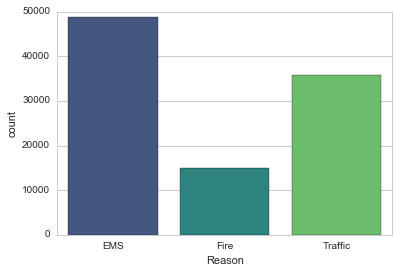

In [149]:
sns.countplot(x='Reason',data=df,palette='viridis')

In [150]:
type(df['timeStamp'].iloc[0])

str

** convert the column from strings to DateTime objects. **

In [151]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [152]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [153]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
#dmap1 = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
#dmap2 = {17:'Late', 16:'Late', 15:'Middle'}

In [154]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [155]:
df['Month'] = df['Month'].map(dmap1)

In [156]:
df['Hour'] = df['Hour']

In [157]:
del df['lat']

In [158]:
del df['lng']

In [159]:
del df['desc']

In [160]:
del df['e']

In [161]:
df.head(5)

,zip,title,timeStamp,twp,addr,Reason1,Reason,Hour,Month,Day of Week
0,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,BACK PAINS/INJURY,EMS,17,Dec,Thu
1,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,DIABETIC EMERGENCY,EMS,17,Dec,Thu
2,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,GAS-ODOR/LEAK,Fire,17,Dec,Thu
3,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,CARDIAC EMERGENCY,EMS,17,Dec,Thu
4,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,DIZZINESS,EMS,17,Dec,Thu


** Seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

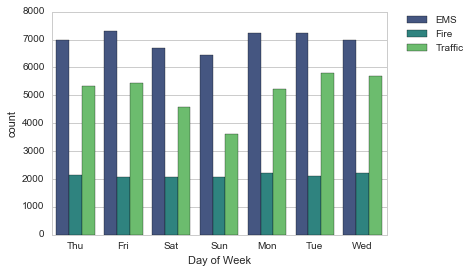

In [162]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

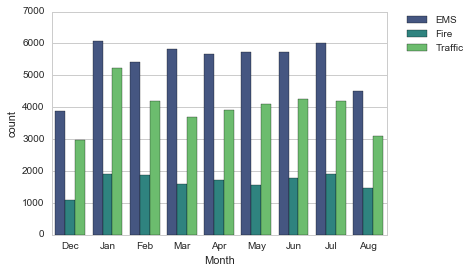

In [163]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

** Create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [164]:
byMonth = df.groupby('Month').count()
byMonth.head()

,zip,title,timeStamp,twp,addr,Reason1,Reason,Hour,Day of Week
Month,,,,,,,,,
Apr,9895,11326,11326,11323,11283,11326,11326,11326,11326
Aug,7832,9078,9078,9073,9025,9078,9078,9078,9078
Dec,6907,7969,7969,7963,7916,7969,7969,7969,7969
Feb,9930,11467,11467,11465,11396,11467,11467,11467,11467
Jan,11527,13205,13205,13203,13096,13205,13205,13205,13205


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

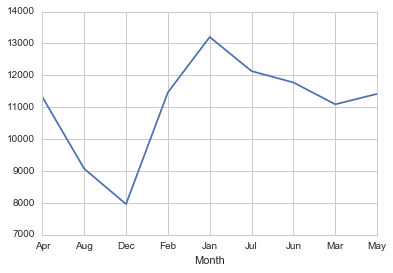

In [165]:
byMonth['twp'].plot()

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. In the Group by object Month is set as the index, the reset option makes month a column in the object **

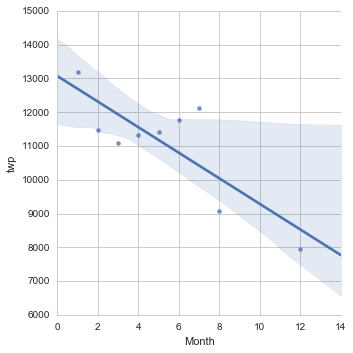

In [123]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.  There is a difference between timeStamp and date objects ** 

In [166]:
t = df['timeStamp'].iloc[0]

In [167]:
t

Timestamp('2015-12-10 17:40:00')

In [168]:
t.date()

datetime.date(2015, 12, 10)

In [169]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())


In [170]:
df.head()

,zip,title,timeStamp,twp,addr,Reason1,Reason,Hour,Month,Day of Week,Date
0,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,BACK PAINS/INJURY,EMS,17,Dec,Thu,2015-12-10
1,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,DIABETIC EMERGENCY,EMS,17,Dec,Thu,2015-12-10
2,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,GAS-ODOR/LEAK,Fire,17,Dec,Thu,2015-12-10
3,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,CARDIAC EMERGENCY,EMS,17,Dec,Thu,2015-12-10
4,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,DIZZINESS,EMS,17,Dec,Thu,2015-12-10


** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

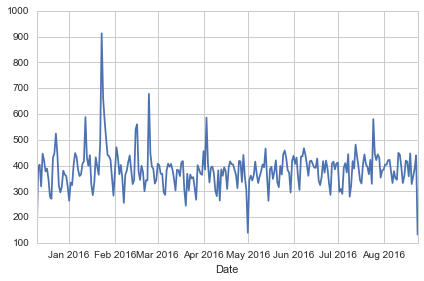

In [172]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

In [173]:
df.groupby('Date').count().head()

,zip,title,timeStamp,twp,addr,Reason1,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,
2015-12-10,100,115,115,115,113,115,115,115,115,115
2015-12-11,333,396,396,395,391,396,396,396,396,396
2015-12-12,333,403,403,403,401,403,403,403,403,403
2015-12-13,280,319,319,319,317,319,319,319,319,319
2015-12-14,387,447,447,446,445,447,447,447,447,447


** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

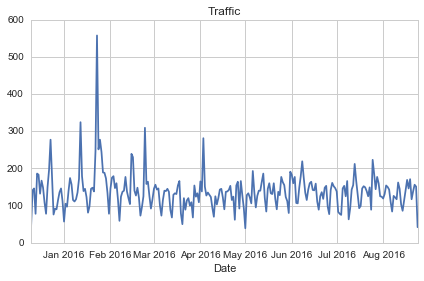

In [174]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

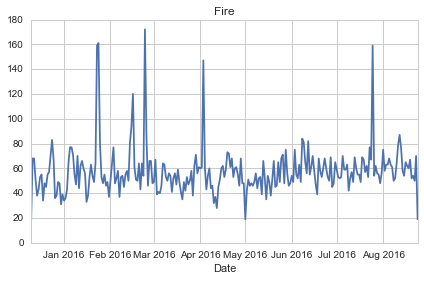

In [175]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

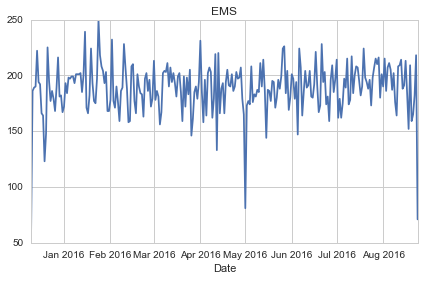

In [176]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

____
**Creating  heatmaps with seaborn.  First group by a list of two varables and count option.  Secnod, use the unstack option to create a crosstab Select on variable for counting**

In [177]:
df.groupby(['Day of Week','Hour']).count()

zip  title  timeStamp   twp  addr  Reason1  Reason  Month  \
Day of Week Hour                                                              
Fri         0     248    275        275   275   275      275     275    275   
            1     200    235        235   235   232      235     235    235   
            2     165    191        191   191   191      191     191    191   
            3     164    175        175   175   175      175     175    175   
            4     184    201        201   201   201      201     201    201   
            5     166    194        194   194   194      194     194    194   
            6     319    372        372   372   369      372     372    372   
            7     526    598        598   598   593      598     598    598   
            8     637    742        742   742   737      742     742    742   
            9     663    752        752   752   748      752     752    752   
            10    722    803        803   803   800      803     803    803   
            11    756    859        859   859   858      859     859    859   
            12    764    885        885   885   877      885     885    885   
            13    767    890        890   890   885      890     890    890   
            14    808    932        932   931   926      932     932    932   
            15    840    980        980   980   976      980     980    980   
            16    897   1039       1039  1039  1038     1039    1039   1039   
            17    826    980        980   980   971      980     980    980   
            18    714    820        820   819   818      820     820    820   
            19    616    696        696   696   693      696     696    696   
            20    569    667        667   667   666      667     667    667   
            21    491    559        559   558   553      559     559    559   
            22    445    514        514   514   513      514     514    514   
            23    400    474        474   474   469      474     474    474   
Mon         0     243    282        282   282   282      282     282    282   
            1     198    221        221   220   221      221     221    221   
            2     183    201        201   201   201      201     201    201   
            3     173    194        194   194   194      194     194    194   
            4     185    204        204   204   203      204     204    204   
            5     222    267        267   267   267      267     267    267   
...               ...    ...        ...   ...   ...      ...     ...    ...   
Tue         18    761    905        905   905   900      905     905    905   
            19    666    731        731   731   722      731     731    731   
            20    579    647        647   647   646      647     647    647   
            21    494    571        571   570   565      571     571    571   
            22    411    462        462   462   460      462     462    462   
            23    245    274        274   274   273      274     274    274   
Wed         0     226    250        250   249   249      250     250    250   
            1     193    216        216   216   216      216     216    216   
            2     169    189        189   189   188      189     189    189   
            3     195    209        209   207   209      209     209    209   
            4     138    156        156   156   155      156     156    156   
            5     224    255        255   254   254      255     255    255   
            6     334    410        410   409   409      410     410    410   
            7     591    701        701   701   692      701     701    701   
            8     770    875        875   875   872      875     875    875   
            9     714    808        808   808   805      808     808    808   
            10    713    800        800   800   799      800     800    800   
            11    698    789        789   789   784      789     789

In [178]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


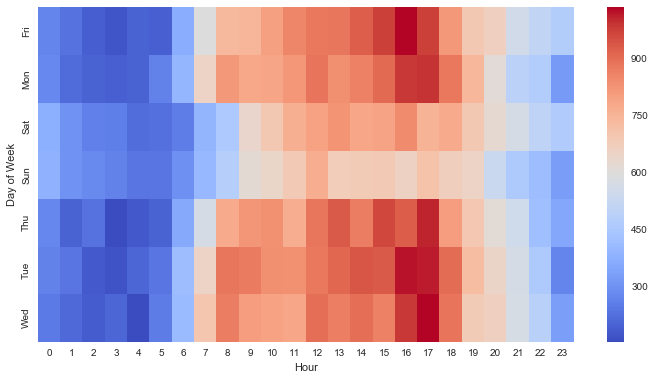

In [179]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='coolwarm')

** Table for Months. **

In [105]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


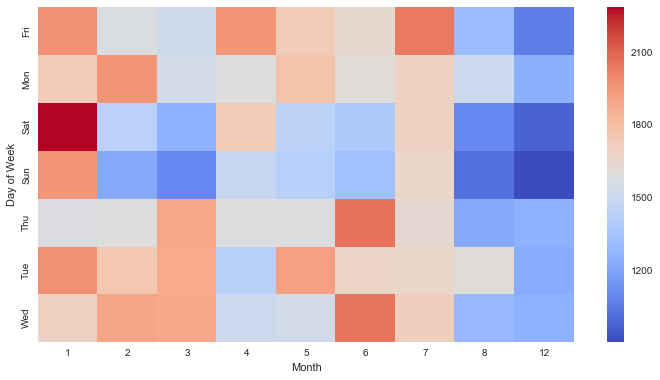

In [180]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='coolwarm')